In [42]:
from data_preprocess import preprocess
import pandas as pd
import numpy as np

In [6]:
df_data = preprocess()

/Users/xihegu/Documents/UCSD/MS1/ECE143/proj/dental_hygiene/data_preprocess.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dietary = pd.read_sas(dietary_path if os.path.exists(dietary_path) else dietary_url)
/Users/xihegu/Documents/UCSD/MS1/ECE143/proj/dental_hygiene/data_preprocess.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dietary = pd.read_sas(dietary_path if os.path.exists(dietary_path) else dietary_url)
/Users/xihegu/Documents/UCSD/MS1/ECE143/proj/dental_hygiene/data_preprocess.py:22: PerformanceWarnin

In [20]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11196 entries, 0 to 13770
Columns: 245 entries, SEQN to OHXRRESO
dtypes: float64(245)
memory usage: 21.3 MB


In [25]:
df_dietary = pd.concat([df_data.loc[:,"SEQN"], df_data.loc[:,"DSDCOUNT":"DSQTIODI"]], axis = 1)
df_dietary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11196 entries, 0 to 13770
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      11196 non-null  float64
 1   DSDCOUNT  11196 non-null  float64
 2   DSDANCNT  11196 non-null  float64
 3   DSD010    11196 non-null  float64
 4   DSD010AN  11196 non-null  float64
 5   DSQTKCAL  11196 non-null  float64
 6   DSQTPROT  11196 non-null  float64
 7   DSQTCARB  11196 non-null  float64
 8   DSQTSUGR  11196 non-null  float64
 9   DSQTFIBE  11196 non-null  float64
 10  DSQTTFAT  11196 non-null  float64
 11  DSQTSFAT  11196 non-null  float64
 12  DSQTMFAT  11196 non-null  float64
 13  DSQTPFAT  11196 non-null  float64
 14  DSQTCHOL  11196 non-null  float64
 15  DSQTLYCO  11196 non-null  float64
 16  DSQTLZ    11196 non-null  float64
 17  DSQTVB1   11196 non-null  float64
 18  DSQTVB2   11196 non-null  float64
 19  DSQTNIAC  11196 non-null  float64
 20  DSQTVB6   11196 non-null  fl

## Pearson Correlation

In [47]:
df_corr = df_dietary.corr()
np.fill_diagonal(df_corr.values, 0)
df_corr.style.highlight_max(color='red').highlight_min(color='blue')


,SEQN,DSDCOUNT,DSDANCNT,DSD010,DSD010AN,DSQTKCAL,DSQTPROT,DSQTCARB,DSQTSUGR,DSQTFIBE,DSQTTFAT,DSQTSFAT,DSQTMFAT,DSQTPFAT,DSQTCHOL,DSQTLYCO,DSQTLZ,DSQTVB1,DSQTVB2,DSQTNIAC,DSQTVB6,DSQTFA,DSQTFDFE,DSQTCHL,DSQTVB12,DSQTVC,DSQTVK,DSQTVD,DSQTCALC,DSQTPHOS,DSQTMAGN,DSQTIRON,DSQTZINC,DSQTCOPP,DSQTSODI,DSQTPOTA,DSQTSELE,DSQTCAFF,DSQTIODI
SEQN,0.000000,-0.022497,-0.017727,0.018782,-0.005700,-0.003531,-0.000127,0.005874,0.000761,0.002443,-0.016635,-0.004357,-0.007262,-0.013927,-0.008042,-0.008690,-0.010157,-0.011790,-0.003476,0.001727,-0.021800,-0.014266,-0.014269,0.011585,-0.005903,-0.015371,-0.002942,-0.009720,-0.013422,-0.009984,-0.017312,-0.010793,-0.020806,-0.023947,-0.019592,-0.018820,-0.022267,-0.005271,-0.010717
DSDCOUNT,-0.022497,0.000000,0.396428,-0.241770,0.072182,0.189072,0.068886,0.107234,0.115969,0.069054,0.270736,0.100342,0.119119,0.150581,0.135807,0.108108,0.201233,0.221469,0.192761,0.177102,0.208925,0.295803,0.295800,0.069355,0.231303,0.186170,0.053093,0.222455,0.309628,0.138414,0.283774,0.166740,0.278578,0.256268,0.088435,0.102668,0.207546,0.047629,0.120634
DSDANCNT,-0.017727,0.396428,0.000000,0.112109,0.136934,0.001878,0.000628,0.003499,0.003249,0.003557,0.002237,-0.000490,-0.001543,-0.000177,0.003189,-0.000569,0.001215,0.000448,-0.000276,0.002811,0.001870,0.011258,0.011259,-0.000947,0.004822,0.001878,0.009595,0.002809,0.036459,0.002305,0.008264,0.012274,0.013608,0.029968,0.002474,0.001056,0.002207,0.004795,0.004929
DSD010,0.018782,-0.241770,0.112109,0.000000,0.130014,-0.187729,-0.056716,-0.149863,-0.235189,-0.083941,-0.191248,-0.063117,-0.064244,-0.095747,-0.107690,-0.092184,-0.098554,-0.159158,-0.149653,-0.161666,-0.164248,-0.356399,-0.356393,-0.060058,-0.167922,-0.160447,-0.079850,-0.236654,-0.320472,-0.135800,-0.223879,-0.225972,-0.293054,-0.324358,-0.073581,-0.112708,-0.228766,-0.029642,-0.145610
DSD010AN,-0.005700,0.072182,0.136934,0.130014,0.000000,-0.022784,-0.008293,-0.018271,-0.030384,-0.018257,-0.023941,-0.000110,0.001004,-0.008325,-0.019343,-0.006211,-0.015998,-0.014424,-0.007350,-0.016197,-0.019439,-0.046062,-0.046069,-0.001499,-0.034682,-0.018624,-0.031013,-0.026265,-0.187809,-0.023897,-0.047450,-0.027761,-0.054814,-0.054639,-0.007128,-0.013347,-0.032204,-0.026653,-0.006876
DSQTKCAL,-0.003531,0.189072,0.001878,-0.187729,-0.022784,0.000000,0.724330,0.864474,0.531774,0.313235,0.525391,0.491153,0.192150,0.220880,0.628064,0.066424,0.069153,0.082083,0.096847,0.074766,0.109740,0.149767,0.149771,0.265747,0.062192,0.078695,0.022668,0.074531,0.166848,0.508037,0.124068,0.032127,0.123017,0.122705,0.365166,0.237516,0.115313,0.020027,0.052901
DSQTPROT,-0.000127,0.068886,0.000628,-0.056716,-0.008293,0.724330,0.000000,0.450667,0.218125,0.115568,0.302937,0.422669,0.017440,0.021107,0.739729,0.019062,0.008836,0.057878,0.083883,0.030488,0.072703,0.052742,0.052755,0.139059,0.018567,0.018958,0.010229,0.015766,0.076921,0.305845,0.043569,0.007296,0.059105,0.082282,0.259443,0.190990,0.077033,0.000546,0.018437
DSQTCARB,0.005874,0.107234,0.003499,-0.149863,-0.018271,0.864474,0.450667,0.000000,0.631080,0.456529,0.153282,0.194213,0.025249,0.019158,0.277206,0.016443,0.020879,0.035344,0.045938,0.037582,0.058382,0.109942,0.109940,0.288004,0.027882,0.045833,0.013250,0.045713,0.117122,0.520408,0.067767,0.014012,0.070897,0.063410,0.264136,0.207822,0.061736,0.005029,0.031902
DSQTSUGR,0.000761,0.115969,0.003249,-0.235189,-0.030384,0.531774,0.218125,0.631080,0.000000,0.381194,0.067895,0.084333,0.010285,0.010293,0.156968,0.005845,0.022254,0.008967,0.007937,0.024619,0.035269,0.139379,0.139377,0.092373,0.020106,0.041804,0.000345,0.055526,0.067806,0.226991,0.029342,0.012780,0.062176,0.026840,0.123362,0.106330,0.016316,-0.001940,0.039490
DSQTFIBE,0.002443,0.069054,0.003557,-0.083941,-0.018257,0.313235,0.115568,0.456529,0.381194,0.000000,0.062471,0.044561,0.030025,0.014100,0.066764,0.009003,0.005196,0.003503,0.008924,0.014710,0.009753,0.035136,0.035137,0.027469,0.021729,0.018826,0.005089,0.020122,0.041387,0.066692,0.041086,0.001703,0.044592,0.074

### Observe high correlation between:

| Feature 1 | Feature 2 | Corr|
| --- | --- | --- |
|DSQTFA|DSQTFDFE|1.0|
|DSQTKCAL|DSQTCARB|0.86|
|DSQTMFAT|DSQTPFAT|0.75|
|DSQTPROT|DSQTCHOL|0.74|
|DSQTKCAL|DSQTPROT|0.72|


There appear many pairs with correlation > 0.6

In [ ]:
# print(df_corr.stack())
# def is_high_correlation(corr):
#     threshold = 0.8
#     if abs(corr) > threshold:
#         return True
#     else:
#         return False

# df_corr = df_corr.applymap(is_high_correlation)

In [53]:
import matplotlib.pyplot as plt
import scipy
plt.style.use('ggplot')



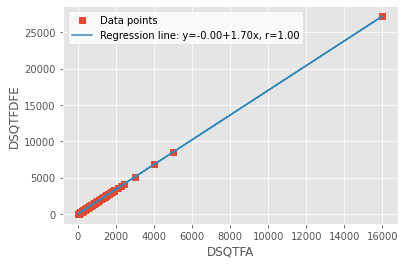

In [58]:
x = df_dietary["DSQTFA"]
y = df_dietary["DSQTFDFE"]

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('DSQTFA')
ax.set_ylabel('DSQTFDFE')
ax.legend(facecolor='white')
plt.show()

DSQTFA: Folic acid (mcg)
DSQTFDFE: Folate, DFE (mcg)g

Same meaning

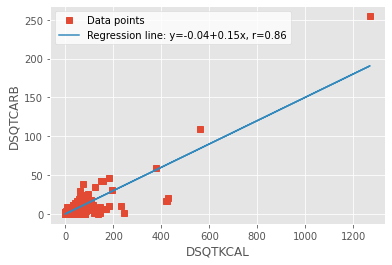

In [56]:
x = df_dietary["DSQTKCAL"]
y = df_dietary["DSQTCARB"]

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('DSQTKCAL')
ax.set_ylabel('DSQTCARB')
ax.legend(facecolor='white')
plt.show()

DSQTKCAL: Energy (kcal)
DSQTCARB: Carbohydrate (gm)

Carbohydrate takes up a great amount of energy intake, so these are highly correlated.

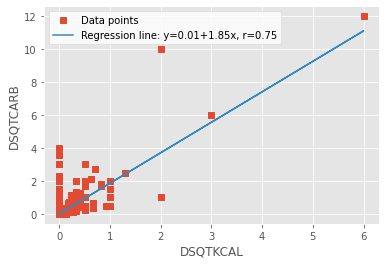

In [57]:
x = df_dietary["DSQTMFAT"]
y = df_dietary["DSQTPFAT"]
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('DSQTMFAT')
ax.set_ylabel('DSQTPFAT')
ax.legend(facecolor='white')
plt.show()

DSQTMFAT: Total monosaturated fatty acids (gm)
DSQTPFAT: Total polyunsaturated fatty acids (gm)

Food contain high monosaturated fatty acids tends to also have high polyunsaturated fatty acids, such as vegetable oils.

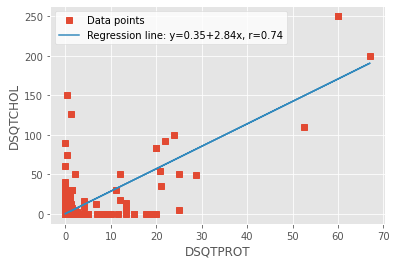

In [59]:
x = df_dietary["DSQTPROT"]
y = df_dietary["DSQTCHOL"]
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('DSQTPROT')
ax.set_ylabel('DSQTCHOL')
ax.legend(facecolor='white')
plt.show()

DSQTPROT: Protein (gm)
DSQTCHOL: Cholesterol (mg)

Many food with high protein also has high cholesterol.

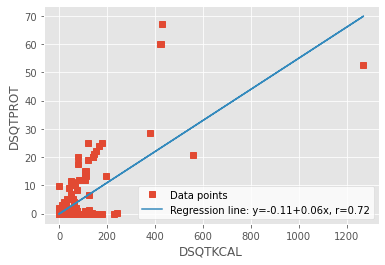

In [60]:

x = df_dietary["DSQTKCAL"]
y = df_dietary["DSQTPROT"]
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('DSQTKCAL')
ax.set_ylabel('DSQTPROT')
ax.legend(facecolor='white')
plt.show()

DSQTKCAL: Energy (kcal)
DSQTPROT: Protein (gm)

People who takes in a lot of energy also tend to take in a lot of protein. (Energy and total fat only has 0.525 corr)

From the plots above, we definitely should ignore one variable between DSQTFA and DSQTFDFE. However, for other pairs, although they have high pearson correlation, it is mainly led by the outliers. For most of the observations, there is no significant correlation. We can discuss about how we should deal with them.

## Rand Correlation

In [64]:
df_rank_corr = df_dietary.corr(method='spearman')
np.fill_diagonal(df_rank_corr.values, 0)
df_rank_corr.style.highlight_max(color='red').highlight_min(color='blue')

,SEQN,DSDCOUNT,DSDANCNT,DSD010,DSD010AN,DSQTKCAL,DSQTPROT,DSQTCARB,DSQTSUGR,DSQTFIBE,DSQTTFAT,DSQTSFAT,DSQTMFAT,DSQTPFAT,DSQTCHOL,DSQTLYCO,DSQTLZ,DSQTVB1,DSQTVB2,DSQTNIAC,DSQTVB6,DSQTFA,DSQTFDFE,DSQTCHL,DSQTVB12,DSQTVC,DSQTVK,DSQTVD,DSQTCALC,DSQTPHOS,DSQTMAGN,DSQTIRON,DSQTZINC,DSQTCOPP,DSQTSODI,DSQTPOTA,DSQTSELE,DSQTCAFF,DSQTIODI
SEQN,0.000000,-0.028222,-0.001458,0.020627,-0.000623,-0.020571,0.002528,-0.005378,0.001256,-0.001171,-0.027923,0.003715,-0.006752,-0.011803,-0.023402,-0.018883,-0.021046,-0.042500,-0.043208,-0.037666,-0.030074,-0.031247,-0.031267,0.000908,-0.028528,-0.028631,-0.038834,-0.024816,-0.027350,-0.028095,-0.033134,-0.026787,-0.030665,-0.040468,-0.019590,-0.027826,-0.032953,0.002808,-0.030242
DSDCOUNT,-0.028222,0.000000,0.107866,-0.942312,-0.103993,0.580892,0.239615,0.457048,0.322220,0.174336,0.449571,0.186713,0.150289,0.239688,0.338734,0.329272,0.368765,0.564548,0.563366,0.592735,0.656608,0.640936,0.640935,0.269380,0.701238,0.723228,0.469794,0.761153,0.575840,0.381092,0.520639,0.414118,0.625323,0.505124,0.315033,0.408671,0.499586,0.070267,0.535543
DSDANCNT,-0.001458,0.107866,0.000000,-0.093594,-0.992269,0.078901,0.046663,0.072997,0.069410,0.036055,0.035070,0.015512,0.015614,0.023510,0.048785,0.052718,0.027829,0.055765,0.056475,0.075928,0.054791,0.055787,0.055819,0.002005,0.065323,0.061863,0.057811,0.072669,0.459164,0.050970,0.153835,0.043546,0.057090,0.069800,0.169078,0.046610,0.068164,0.024486,0.031718
DSD010,0.020627,-0.942312,-0.093594,0.000000,0.096330,-0.538018,-0.181562,-0.476647,-0.372205,-0.154480,-0.326847,-0.133824,-0.105791,-0.174387,-0.249253,-0.283557,-0.309472,-0.508597,-0.508059,-0.539650,-0.636156,-0.624656,-0.624655,-0.259625,-0.665389,-0.693173,-0.432284,-0.725665,-0.511816,-0.331858,-0.435857,-0.389413,-0.603079,-0.449518,-0.294342,-0.349592,-0.441996,-0.052218,-0.531963
DSD010AN,-0.000623,-0.103993,-0.992269,0.096330,0.000000,-0.079462,-0.046629,-0.071810,-0.069323,-0.036211,-0.035758,-0.015482,-0.015991,-0.023933,-0.049291,-0.053405,-0.028648,-0.055273,-0.055984,-0.075667,-0.054746,-0.055623,-0.055654,-0.002693,-0.065380,-0.062111,-0.056819,-0.073053,-0.459135,-0.051629,-0.153471,-0.042260,-0.056788,-0.068868,-0.167306,-0.047004,-0.069061,-0.024723,-0.031161
DSQTKCAL,-0.020571,0.580892,0.078901,-0.538018,-0.079462,0.000000,0.342056,0.779330,0.683526,0.285327,0.613732,0.267328,0.211979,0.333830,0.440611,0.144759,0.284015,0.227523,0.231203,0.310706,0.505637,0.486388,0.486389,0.363743,0.482239,0.518124,0.175242,0.471727,0.272960,0.214640,0.260459,0.127288,0.457998,0.183843,0.402244,0.199309,0.233329,0.049654,0.430039
DSQTPROT,0.002528,0.239615,0.046663,-0.181562,-0.046629,0.342056,0.000000,0.310532,0.100846,0.263279,0.375642,0.280543,0.205790,0.401933,0.378400,0.097471,0.107607,0.140008,0.139634,0.147763,0.138142,0.130276,0.130316,0.055850,0.136272,0.167336,0.112783,0.152363,0.166252,0.106574,0.179942,0.123211,0.146814,0.138308,0.191400,0.176506,0.151472,0.024764,0.112065
DSQTCARB,-0.005378,0.457048,0.072997,-0.476647,-0.071810,0.779330,0.310532,0.000000,0.804528,0.331580,0.176835,0.137708,0.104385,0.162771,0.166914,0.048278,0.183282,0.173461,0.177790,0.261897,0.489333,0.483667,0.483674,0.352006,0.455582,0.492694,0.146101,0.415672,0.213324,0.150317,0.144207,0.130119,0.423394,0.111225,0.508286,0.114824,0.123708,0.023978,0.432085
DSQTSUGR,0.001256,0.322220,0.069410,-0.372205,-0.069323,0.683526,0.100846,0.804528,0.000000,0.206742,0.034485,0.061740,0.020874,0.006129,0.038541,-0.031863,0.109455,0.023041,0.027965,0.132526,0.406234,0.404782,0.404795,0.389820,0.375047,0.392642,0.012110,0.323583,0.100110,0.098355,0.045830,0.021900,0.339431,-0.030916,0.378409,0.034959,0.029347,0.016108,0.370568
DSQTFIBE,-0.001171,0.174336,0.036055,-0.154480,-0.036211,0.285327,0.263279,0.331580,0.206742,0.000000,0.113425,0.118768,0.043159,0.027440,0.071822,0.049921,0.053729,0.077049,0.077931,0.070082,0.079315,0.075070,0.075098,0.049826,0.066378,0.098969,0.060458,0.059906,0.090083,0.065194,0.104733,0.136218,0.074776,0.

Those pairs with high pearson correlation have rank correlation aroung 0.6+, which is not very high. However, there are several pairs with really significant rank correlation, 0.9+